In [1]:
import pandas as pd
import urllib.request

data = pd.read_csv('../../twitter/tweetdata/2018_complement1_tweet.csv', error_bad_lines=False)
data = data.append(pd.read_csv('../../twitter/tweetdata/2018_complement1_tweet(e).csv', error_bad_lines=False))


In [2]:
text = data[['text']].astype(str)
text['text'] = text.apply(lambda row: row['text'].replace("/"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("-"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("—"," "), axis=1)
#text['main article'] = text.apply(lambda row: row['main article'].replace("",""), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("*"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("…"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("\\"," "), axis=1)



In [3]:
import nltk
text['text'] = text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

In [4]:
text['text']

0      [Happy, Halloween, and, 10, years, anniversary...
1      [fundamentals, ., Us, a, valid, way, to, escap...
2      [The, war, raging, around, Jihan, Wu, was, sta...
3      [It, 's, not, dumb, to, ask, questions, ., Sta...
4      [There, are, no, thrones, here, ., Just, paths...
                             ...                        
182    [Do, you, know, what, ETHEREUM, 2.0, looks, li...
183    [I, find, this, very, funny, ., I, mean, this,...
184    [Is, @, ErikVoorhees, convinced, about, Ethere...
185    [BANG, !, !, Big, show, today, !, @, cz_binanc...
186    [Judging, Ethereum, today, is, like, judging, ...
Name: text, Length: 1579, dtype: object

In [5]:
# 소문자 적용 , - 문자 삭제
text['text'] = text['text'].apply(lambda x : [word.lower().replace("-","") for word in x])
# 공백문자 삭제
text['text'] = text['text'].apply(lambda x : [word for word in x if word])

In [6]:
from nltk.tag import pos_tag

text['pos tag'] = text.apply(lambda row: pos_tag(row['text']), axis=1)

In [7]:
text['pos tag']

0      [(happy, JJ), (halloween, NN), (and, CC), (10,...
1      [(fundamentals, NNS), (., .), (us, PRP), (a, D...
2      [(the, DT), (war, NN), (raging, VBG), (around,...
3      [(it, PRP), ('s, VBZ), (not, RB), (dumb, JJ), ...
4      [(there, EX), (are, VBP), (no, DT), (thrones, ...
                             ...                        
182    [(do, VB), (you, PRP), (know, VB), (what, WP),...
183    [(i, NN), (find, VBP), (this, DT), (very, RB),...
184    [(is, VBZ), (@, JJ), (erikvoorhees, NNS), (con...
185    [(bang, NN), (!, .), (!, .), (big, JJ), (show,...
186    [(judging, VBG), (ethereum, NN), (today, NN), ...
Name: pos tag, Length: 1579, dtype: object

In [8]:
# 불용어 품사 제거
text['text'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('CC','CD','DT','EX','IN','LS','MD','PRP','PRP$','RB','TO','UH','WDT','WP','WP$','WRB')])

In [9]:
text['text']

0      [happy, halloween, years, anniversary, #, bitc...
1      [fundamentals, ., valid, way, escape, stagnant...
2      [war, raging, jihan, wu, was, started, egos, s...
3      ['s, dumb, ask, questions, ., start, googling,...
4      [are, thrones, ., paths, have, been, taken, bi...
                             ...                        
182    [do, know, ethereum, looks, ?, check, out, cov...
183    [i, find, funny, ., i, mean, tweet, is, coming...
184    [is, @, erikvoorhees, convinced, ethereum, ?, ...
185    [bang, !, !, big, show, today, !, @, cz_binanc...
186    [judging, ethereum, today, is, judging, intern...
Name: text, Length: 1579, dtype: object

In [10]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['text'] = text['text'].apply(lambda x: [word for word in x if word not in (stop)])

In [11]:
import csv
stopword_list =[]
f = open('../../stopword/stop_en.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['text'] = text['text'].apply(lambda x: [word for word in x if word not in stopword_list])

In [12]:
import re
pattern=re.compile(r'\.')
print(pattern.search('abc.de'))

text['text'] = text['text'].apply(lambda x: [word for word in x if pattern.search(word)== None])

<re.Match object; span=(3, 4), match='.'>


In [13]:
number_pattern=re.compile(r'[0-9]\,[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if number_pattern.search(word)== None])

In [14]:
native_number_pattern=re.compile(r'[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if native_number_pattern.search(word)== None])

In [15]:
star_pattern=re.compile(r'[a-z0-9*]\*[a-z0-9*]')
text['text'] = text['text'].apply(lambda x: [word for word in x if star_pattern.search(word)== None])

In [16]:
from nltk.stem import WordNetLemmatizer
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) # 동사 
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='a') for word in x]) # 형용사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='n') for word in x]) # 명사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='r') for word in x]) # 부사
#print(text)

In [17]:
tokenized_doc = text['text'].apply(lambda x: [word for word in x if len(word) > 3])
#print(tokenized_doc)

In [18]:
article_contents = tokenized_doc.values.tolist()

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [20]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [21]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [22]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [23]:
word2id = defaultdict(lambda: 0)

In [24]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [25]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [26]:
len(tf_idf_result)

4037

In [27]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

4037


In [28]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [29]:
import gensim
NUM_TOPICS = 4 #20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=50) 
# passes is similar with epoch , iterarion : loop per document
topics = ldamodel.print_topics(num_words=8)
for topic in topics:
    print(topic)

(0, '0.001*"geography" + 0.001*"rural" + 0.001*"boacksmnfzo" + 0.001*"bbva" + 0.001*"iphone" + 0.001*"charlieshrem" + 0.001*"pegasyseng" + 0.001*"precede"')
(1, '0.014*"getgitcoin" + 0.014*"profile" + 0.014*"japanese" + 0.014*"korean" + 0.014*"rewatch" + 0.014*"oracle" + 0.014*"adler" + 0.014*"nextconf"')
(2, '0.001*"tpay" + 0.001*"niccary" + 0.001*"blossom" + 0.001*"stage" + 0.001*"obsolete" + 0.001*"usability" + 0.001*"\'digital" + 0.001*"asilayhodling"')
(3, '0.001*"journalism" + 0.001*"greenaddress" + 0.001*"wayward" + 0.001*"evoskuil" + 0.001*"unremarkable" + 0.001*"incorporate" + 0.001*"pretender" + 0.001*"alexsunnarborg"')


In [30]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [31]:
sentences = article_contents

In [32]:
from gensim.models import Word2Vec

In [33]:
model = Word2Vec(sentences, min_count=1)

In [34]:
len(model.wv.vocab)

4037

In [35]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [36]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [37]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [38]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [39]:
temp_cluster_result['cluster'] = assigned_clusters

In [40]:
temp_cluster_result['raw_data'] = X.tolist()

In [41]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [42]:
from sklearn.metrics import pairwise_distances

In [43]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [44]:
len(cosine_centroid_list)

4037

In [45]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [46]:
sum(temp_distance[3])

246.21100511927304

In [47]:
import scipy.spatial.distance as dist

In [48]:
dist.cosine(X[0],cosine_centroid_list[0])

0.04012803255734154

In [49]:
dist.euclidean(X[0],cosine_centroid_list[0])

0.02892750999133431

In [50]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [51]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [52]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  # 기타

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
2501,"[0.0028451618272811174, -0.0013062972575426102...",bobbyong,0,"[0.0007969942, -0.00052190025, -0.0007355139, ...",0.549188,0.000542,1.548645,NaN
3442,"[0.0034394103568047285, -0.006312079727649689,...",drawdowns,0,"[0.0007969942, -0.00052190025, -0.0007355139, ...",0.586282,0.000542,1.585739,NaN
178,"[0.002039788756519556, -0.00042297010077163577...",retard,0,"[0.0007969942, -0.00052190025, -0.0007355139, ...",0.603954,0.000542,1.603411,NaN
1351,"[0.004805279895663261, 0.002206632401794195, -...",independence,0,"[0.0007969942, -0.00052190025, -0.0007355139, ...",0.635002,0.001085,1.633917,NaN
3035,"[0.00047222571447491646, 0.0018027977785095572...",misconception,0,"[0.0007969942, -0.00052190025, -0.0007355139, ...",0.646078,0.000542,1.645535,NaN
135,"[0.005206000525504351, -0.006185992620885372, ...",hint,0,"[0.0007969942, -0.00052190025, -0.0007355139, ...",0.646154,0.000542,1.645612,NaN
474,"[0.0014601772418245673, -0.002392759080976248,...",tutorial,0,"[0.0007969942, -0.00052190025, -0.0007355139, ...",0.648596,0.000542,1.648054,NaN
3753,"[0.005016520619392395, -0.0034389705397188663,...",reflection,0,"[0.0007969942, -0.00052190025, -0.0007355139, ...",0.648995,0.000542,1.648453,NaN
1811,"[0.000912104151211679, -0.004211615305393934, ...",thermodynamic,0,"[0.0007969942, -0.00052190025, -0.0007355139, ...",0.656584,0.000542,1.656041,NaN
2683,"[0.0049143205396831036, 0.0007215397781692445,...",food,0,"[0.0007969942, -0.00052190025, -0.0007355139, ...",0.665504,0.000542,1.664962,NaN


In [53]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 부정적

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
931,"[0.004095090087503195, -0.005838751792907715, ...",suck,1,"[0.0019106417, -0.0016713216, 0.0019113607, -0...",0.198950,0.001627,1.197323,NaN
2615,"[0.0022274155635386705, -0.005474928766489029,...",mystery,1,"[0.0019106417, -0.0016713216, 0.0019113607, -0...",0.239855,0.000542,1.239313,NaN
3456,"[0.00690980302169919, -0.0022789849899709225, ...",maintain,1,"[0.0019106417, -0.0016713216, 0.0019113607, -0...",0.256821,0.001085,1.255736,NaN
1419,"[-0.0005358590860851109, -0.005303606390953064...",mask,1,"[0.0019106417, -0.0016713216, 0.0019113607, -0...",0.256864,0.000542,1.256321,NaN
130,"[0.004670079797506332, -0.005170827265828848, ...",cruise,1,"[0.0019106417, -0.0016713216, 0.0019113607, -0...",0.260052,0.002712,1.257340,NaN
3546,"[0.007230814080685377, -0.001964576542377472, ...",latter,1,"[0.0019106417, -0.0016713216, 0.0019113607, -0...",0.271903,0.000542,1.271361,NaN
3680,"[0.0009703980176709592, -4.0071201510727406e-0...",mechanic,1,"[0.0019106417, -0.0016713216, 0.0019113607, -0...",0.282046,0.000542,1.281504,NaN
846,"[0.00010602288966765627, -0.007779099512845278...",comprise,1,"[0.0019106417, -0.0016713216, 0.0019113607, -0...",0.284406,0.001085,1.283321,NaN
1988,"[0.00224270555190742, -0.004170854575932026, 0...",quantify,1,"[0.0019106417, -0.0016713216, 0.0019113607, -0...",0.289394,0.001085,1.288309,NaN
1281,"[0.004649076145142317, -0.007482130080461502, ...",violation,1,"[0.0019106417, -0.0016713216, 0.0019113607, -0...",0.288898,0.000542,1.288356,NaN


In [54]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(30)   # 비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1114,"[0.0075892312452197075, -0.005158931948244572,...",incredible,2,"[0.0016363502, -0.003602343, 0.00045129727, -0...",0.071545,0.001627,1.069918,NaN
1788,"[0.003474178956821561, -0.012297614477574825, ...",stablecoin,2,"[0.0016363502, -0.003602343, 0.00045129727, -0...",0.080619,0.001085,1.079534,NaN
1142,"[0.0025347319897264242, -0.005427640862762928,...",stake,2,"[0.0016363502, -0.003602343, 0.00045129727, -0...",0.091119,0.002712,1.088407,NaN
2290,"[0.009683788754045963, -0.013460561633110046, ...",seminar,2,"[0.0016363502, -0.003602343, 0.00045129727, -0...",0.089750,0.000542,1.089208,NaN
934,"[0.005695691332221031, -0.014095963910222054, ...",builder,2,"[0.0016363502, -0.003602343, 0.00045129727, -0...",0.090963,0.001085,1.089878,NaN
1941,"[0.003318467875942588, -0.01314404234290123, -...",hire,2,"[0.0016363502, -0.003602343, 0.00045129727, -0...",0.096659,0.001627,1.095032,NaN
2926,"[0.00932205468416214, -0.009514193050563335, -...",fullnode,2,"[0.0016363502, -0.003602343, 0.00045129727, -0...",0.104247,0.002712,1.101535,NaN
1949,"[0.00467555969953537, -0.005974485073238611, 0...",affect,2,"[0.0016363502, -0.003602343, 0.00045129727, -0...",0.104970,0.002169,1.102801,NaN
2587,"[0.009896469302475452, -0.012631440535187721, ...",manual,2,"[0.0016363502, -0.003602343, 0.00045129727, -0...",0.112242,0.001085,1.111157,NaN
108,"[0.006262767128646374, -0.012795835733413696, ...",walk,2,"[0.0016363502, -0.003602343, 0.00045129727, -0...",0.126588,0.002169,1.124418,NaN


In [55]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(30)  # 거래소 돈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
4,"[0.291088730096817, -0.47349998354911804, 0.15...",bitcoin,3,"[0.0099739535, -0.016323568, 0.0051561096, -0....",0.000077,0.905223,0.094854,NaN
162,"[0.12680941820144653, -0.2057991474866867, 0.0...",ethereum,3,"[0.0099739535, -0.016323568, 0.0051561096, -0....",0.000302,0.131797,0.868505,NaN
132,"[0.13291114568710327, -0.2230946570634842, 0.0...",http,3,"[0.0099739535, -0.016323568, 0.0051561096, -0....",0.000333,0.119322,0.881010,NaN
125,"[0.10978620499372482, -0.18216852843761444, 0....",crypto,3,"[0.0099739535, -0.016323568, 0.0051561096, -0....",0.000363,0.080814,0.919549,NaN
209,"[0.11036141216754913, -0.18096396327018738, 0....",trade,3,"[0.0099739535, -0.016323568, 0.0051561096, -0....",0.000343,0.068339,0.932003,NaN
117,"[0.11744578927755356, -0.18039388954639435, 0....",people,3,"[0.0099739535, -0.016323568, 0.0051561096, -0....",0.000363,0.067797,0.932566,NaN
190,"[0.09953305125236511, -0.15819507837295532, 0....",think,3,"[0.0099739535, -0.016323568, 0.0051561096, -0....",0.000525,0.067254,0.933271,NaN
590,"[0.11430833488702774, -0.1937350481748581, 0.0...",time,3,"[0.0099739535, -0.016323568, 0.0051561096, -0....",0.000321,0.061831,0.938491,NaN
121,"[0.09551434218883514, -0.1533156782388687, 0.0...",make,3,"[0.0099739535, -0.016323568, 0.0051561096, -0....",0.000586,0.061831,0.938755,NaN
95,"[0.12662458419799805, -0.19899596273899078, 0....",market,3,"[0.0099739535, -0.016323568, 0.0051561096, -0....",0.000320,0.060746,0.939574,NaN


In [56]:
y_km = temp_cluster_result['cluster'].values

In [57]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

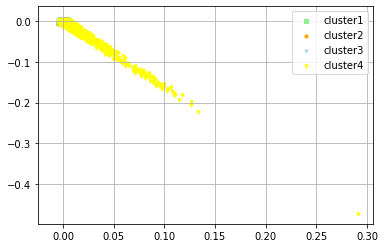

In [58]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [59]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 기타

104

In [60]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 부정

396

In [61]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 비즈

653

In [62]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 거래소 돈

2884

In [63]:
temp_cluster_result['category'] = 1 # 1 영문뉴스, 2 국문뉴스 , 3 twitter
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 13 # 기타
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 2 # 부정
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label'] = 7 # 비즈
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 12 # 가격,거래소

In [64]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [65]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [66]:
kmeans.inertia_

13.359549577696063

In [67]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[0 2 3 ... 2 2 2]


In [68]:
cluster_values= list(model.wv.vocab)

In [69]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-13.35955


In [70]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [71]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.5620091


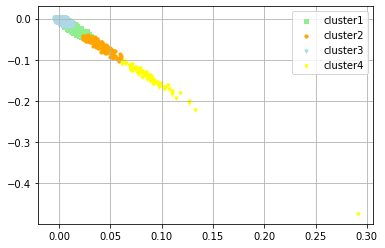

In [72]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [73]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [74]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [75]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [76]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [77]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [78]:
import scipy.spatial.distance as dist

In [79]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [80]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [81]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(50,'score') # 인플

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
2550,"[0.017781972885131836, -0.027791228145360947, ...",jimmysong,0,"[0.014711099, -0.024109734, 0.0073598865, -0.0...",0.028841,0.007051,1.021791,NaN
2375,"[0.011913220398128033, -0.02589033916592598, 0...",triangle,0,"[0.014711099, -0.024109734, 0.0073598865, -0.0...",0.026795,0.004881,1.021914,NaN
1644,"[0.01015911903232336, -0.023359810933470726, 0...",physical,0,"[0.014711099, -0.024109734, 0.0073598865, -0.0...",0.028443,0.005966,1.022477,NaN
682,"[0.017282044515013695, -0.025532659143209457, ...",statement,0,"[0.014711099, -0.024109734, 0.0073598865, -0.0...",0.028123,0.005424,1.022699,NaN
845,"[0.018420105800032616, -0.025660797953605652, ...",area,0,"[0.014711099, -0.024109734, 0.0073598865, -0.0...",0.027149,0.004339,1.022810,NaN
707,"[0.0200208630412817, -0.026237085461616516, 0....",volatile,0,"[0.014711099, -0.024109734, 0.0073598865, -0.0...",0.027737,0.004881,1.022855,NaN
252,"[0.016954530030488968, -0.023937610909342766, ...",theory,0,"[0.014711099, -0.024109734, 0.0073598865, -0.0...",0.027757,0.004881,1.022876,NaN
811,"[0.013327397406101227, -0.023837624117732048, ...",tomorrow,0,"[0.014711099, -0.024109734, 0.0073598865, -0.0...",0.026697,0.003797,1.022900,NaN
523,"[0.016241049394011497, -0.02450449950993061, 0...",initial,0,"[0.014711099, -0.024109734, 0.0073598865, -0.0...",0.027379,0.004339,1.023040,NaN
686,"[0.014119262807071209, -0.027426954358816147, ...",metric,0,"[0.014711099, -0.024109734, 0.0073598865, -0.0...",0.028083,0.004881,1.023201,NaN


In [82]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(30,'score') # 비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
902,"[0.043050624430179596, -0.0675043985247612, 0....",secure,1,"[0.03858576, -0.062990725, 0.019972835, -0.049...",0.030731,0.016271,1.014460,NaN
208,"[0.037143632769584656, -0.06103227287530899, 0...",wallet,1,"[0.03858576, -0.062990725, 0.019972835, -0.049...",0.029532,0.014644,1.014888,NaN
471,"[0.03646997734904289, -0.06815409660339355, 0....",financial,1,"[0.03858576, -0.062990725, 0.019972835, -0.049...",0.026783,0.011390,1.015394,NaN
897,"[0.038271497935056686, -0.06790311634540558, 0...",late,1,"[0.03858576, -0.062990725, 0.019972835, -0.049...",0.030726,0.015186,1.015539,NaN
605,"[0.04193992540240288, -0.060383789241313934, 0...",implementation,1,"[0.03858576, -0.062990725, 0.019972835, -0.049...",0.029492,0.013559,1.015932,NaN
1353,"[0.03729578107595444, -0.062340836971998215, 0...",current,1,"[0.03858576, -0.062990725, 0.019972835, -0.049...",0.027619,0.011390,1.016229,NaN
636,"[0.04290226474404335, -0.06408807635307312, 0....",anything,1,"[0.03858576, -0.062990725, 0.019972835, -0.049...",0.030399,0.014102,1.016297,NaN
496,"[0.04018232971429825, -0.06381217390298843, 0....",resistance,1,"[0.03858576, -0.062990725, 0.019972835, -0.049...",0.030016,0.013559,1.016456,NaN
106,"[0.04210910201072693, -0.06364031136035919, 0....",contract,1,"[0.03858576, -0.062990725, 0.019972835, -0.049...",0.030230,0.013559,1.016671,NaN
192,"[0.03999936953186989, -0.0652952492237091, 0.0...",stop,1,"[0.03858576, -0.062990725, 0.019972835, -0.049...",0.030334,0.013559,1.016775,NaN


In [83]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(40,'score')  # 이슈 

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1315,"[0.00901559367775917, -0.004285676404833794, 0...",pressure,2,"[0.0028300849, -0.004621157, 0.0015103128, -0....",0.025411,0.002169,1.023241,NaN
1390,"[0.003803117433562875, -0.0069577619433403015,...",corner,2,"[0.0028300849, -0.004621157, 0.0015103128, -0....",0.024852,0.001085,1.023767,NaN
2191,"[0.002351700095459819, -0.0009387019090354443,...",integrate,2,"[0.0028300849, -0.004621157, 0.0015103128, -0....",0.025428,0.001627,1.023800,NaN
2141,"[-4.74471744382754e-06, -0.0039566257037222385...",strats,2,"[0.0028300849, -0.004621157, 0.0015103128, -0....",0.024755,0.000542,1.024212,NaN
2433,"[0.0037078040186315775, -0.0018307145219296217...",bitcoinerrorlog,2,"[0.0028300849, -0.004621157, 0.0015103128, -0....",0.025378,0.001085,1.024293,NaN
1957,"[0.0034360752906650305, -0.0007980209775269032...",wizard,2,"[0.0028300849, -0.004621157, 0.0015103128, -0....",0.025449,0.001085,1.024364,NaN
1184,"[0.0016801576130092144, -0.006518072914332151,...",charity,2,"[0.0028300849, -0.004621157, 0.0015103128, -0....",0.025592,0.001085,1.024507,NaN
2585,"[0.005902985576540232, -0.00415450194850564, 0...",swing,2,"[0.0028300849, -0.004621157, 0.0015103128, -0....",0.025248,0.000542,1.024706,NaN
2069,"[0.00026073798653669655, -0.006118020042777061...",cole,2,"[0.0028300849, -0.004621157, 0.0015103128, -0....",0.025361,0.000542,1.024818,NaN
2982,"[0.0013161014067009091, 0.00040327111491933465...",ecdsa,2,"[0.0028300849, -0.004621157, 0.0015103128, -0....",0.026052,0.001085,1.024967,NaN


In [84]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(20,'score') # 기타

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
337,"[0.08554011583328247, -0.14591367542743683, 0....",value,3,"[0.09049309, -0.147935, 0.046430983, -0.115767...",0.029581,0.050983,0.978598,NaN
389,"[0.09242941439151764, -0.1561686396598816, 0.0...",protocol,3,"[0.09049309, -0.147935, 0.046430983, -0.115767...",0.044871,0.056407,0.988465,NaN
81,"[0.08893632143735886, -0.15161609649658203, 0....",world,3,"[0.09049309, -0.147935, 0.046430983, -0.115767...",0.027942,0.033085,0.994857,NaN
347,"[0.0929681733250618, -0.14839226007461548, 0.0...",look,3,"[0.09049309, -0.147935, 0.046430983, -0.115767...",0.033548,0.033627,0.999921,NaN
121,"[0.09551434218883514, -0.1533156782388687, 0.0...",make,3,"[0.09049309, -0.147935, 0.046430983, -0.115767...",0.062023,0.061831,1.000192,NaN
104,"[0.09311851859092712, -0.15409843623638153, 0....",chain,3,"[0.09049309, -0.147935, 0.046430983, -0.115767...",0.044890,0.041220,1.003670,NaN
15,"[0.08849793672561646, -0.1471560001373291, 0.0...",fork,3,"[0.09049309, -0.147935, 0.046430983, -0.115767...",0.044482,0.040136,1.004347,NaN
138,"[0.09135892987251282, -0.15371261537075043, 0....",price,3,"[0.09049309, -0.147935, 0.046430983, -0.115767...",0.050471,0.043932,1.006538,NaN
190,"[0.09953305125236511, -0.15819507837295532, 0....",think,3,"[0.09049309, -0.147935, 0.046430983, -0.115767...",0.074833,0.067254,1.007579,NaN
679,"[0.08847486972808838, -0.1382148414850235, 0.0...",know,3,"[0.09049309, -0.147935, 0.046430983, -0.115767...",0.047222,0.037966,1.009256,NaN


In [89]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) #인플

587

In [90]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) #비즈

179

In [91]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) #이슈

3204

In [92]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) #기타

67

In [93]:
temp_cluster_result1['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 6 # 인플
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 7 # 비즈
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 5 # 이슈
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 13 # 기타

In [94]:
temp_cluster_result1['result'] = 3 # 1 상승 2 하락 3 보합
temp_cluster_result['result'] = 3
temp_cluster_result1['Silhouette'] = 0.5620091 # 1 상승 2 하락 3 보합
temp_cluster_result['Silhouette'] = 0.5620091

In [95]:
temp_cluster_result1.to_csv("../cluster/twitter/twitter_2018_complement1_euclidean.csv")
temp_cluster_result.to_csv("../cluster/twitter/twitter_2018_complement1_cosine.csv")

In [96]:
word_vectors = model.wv

In [97]:
vocabs = word_vectors.vocab.keys()

In [98]:
word_vector_list = [word_vectors[v]for v in vocabs]

In [99]:
print(word_vectors.similarity(w1='little',w2='push'))

0.9842254


In [100]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vector_list)

In [101]:
xys

array([[ 2.11293605e-02,  1.15278084e-03],
       [ 6.48145244e-04,  3.01930638e-03],
       [ 9.04656572e-01, -4.61997049e-03],
       ...,
       [-6.39773710e-02, -8.81685578e-04],
       [-6.39905079e-02,  8.82136507e-04],
       [-7.29785363e-02, -3.79177102e-03]])

In [102]:
xys[:,0]

array([ 2.11293605e-02,  6.48145244e-04,  9.04656572e-01, ...,
       -6.39773710e-02, -6.39905079e-02, -7.29785363e-02])

In [103]:
xys[:,1]

array([ 0.00115278,  0.00301931, -0.00461997, ..., -0.00088169,
        0.00088214, -0.00379177])

In [104]:
xs = xys[:,0]
ys = xys[:,1]

In [105]:
def plot_2d_graph(vocabs,xs,ys) :
    plt.figure(figsize=(8,6))
    plt.scatter(xs,ys,marker='o')
    for i,v in enumerate(vocabs) :
        plt.annotate(v,xy=(xs[i],ys[i]))

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 65507 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 65507 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 65343 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 65343 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8297 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hongminpyo/opt/anaconda3/lib/python3.7

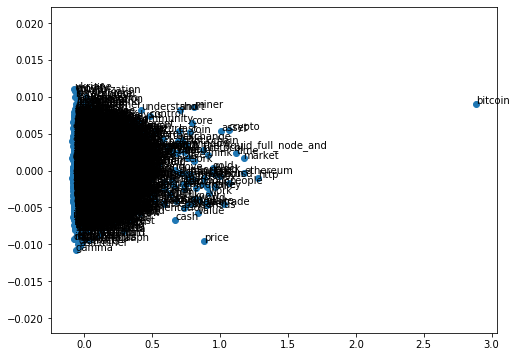

In [106]:
plot_2d_graph(vocabs,xs,ys)

In [107]:
nltk.help.upenn_tagset

<function nltk.help.upenn_tagset(tagpattern=None)>